In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")
gc = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\German_credit_classification.csv")

In [3]:
gc.head(10)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [4]:
gc1 = pd.DataFrame(gc)
id(gc1), id(gc)

(2704185440688, 2704185165080)

In [5]:
gc.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [6]:
gc.head(3)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201


In [7]:
gc.iloc[:, 8:].head(2)

,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201


In [8]:
cat_vars = ["checkingstatus1", "history", "purpose", "savings", "employ", "status", "others", "property", "otherplans", "housing","job","tele", "foreign"]

In [9]:
gc["status"].value_counts()

A93    548
A92    310
A94     92
A91     50
Name: status, dtype: int64

In [10]:
for cat in cat_vars:
    print(gc[cat].value_counts(),"\n")

A14    394
A11    274
A12    269
A13     63
Name: checkingstatus1, dtype: int64 

A32    530
A34    293
A33     88
A31     49
A30     40
Name: history, dtype: int64 

A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: purpose, dtype: int64 

A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings, dtype: int64 

A73    339
A75    253
A74    174
A72    172
A71     62
Name: employ, dtype: int64 

A93    548
A92    310
A94     92
A91     50
Name: status, dtype: int64 

A101    907
A103     52
A102     41
Name: others, dtype: int64 

A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64 

A143    814
A141    139
A142     47
Name: otherplans, dtype: int64 

A152    713
A151    179
A153    108
Name: housing, dtype: int64 

A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64 

A191    596
A192    404
Name: tele, dtype: int64 

A201    963
A202     37
Name: foreign

In [11]:
cat = cat_vars[0]
dummy = pd.get_dummies(gc[cat], prefix = cat, drop_first=True)
dummy.head(3)

,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14
0,0,0,0
1,1,0,0
2,0,0,1


In [12]:
for cat in cat_vars:
    dummy = pd.get_dummies(gc[cat], prefix = cat, drop_first=True)
    gc = pd.concat([gc,dummy], axis = 1)

In [13]:
gc.head(3)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,0,0,1,1,0,0,1,0,1,0
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,0,0,1,1,0,0,1,0,0,0
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,0,0,1,1,0,1,0,0,0,0


In [14]:
gc = gc.drop(cat_vars, axis = 1)

In [15]:
gc.shape

(1000, 49)

In [16]:
gc.columns

Index(['Default', 'duration', 'amount', 'installment', 'residence', 'age',
       'cards', 'liable', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'savings_A62', 'savings_A63',
       'savings_A64', 'savings_A65', 'employ_A72', 'employ_A73', 'employ_A74',
       'employ_A75', 'status_A92', 'status_A93', 'status_A94', 'others_A102',
       'others_A103', 'property_A122', 'property_A123', 'property_A124',
       'otherplans_A142', 'otherplans_A143', 'housing_A152', 'housing_A153',
       'job_A172', 'job_A173', 'job_A174', 'tele_A192', 'foreign_A202'],
      dtype='object')

----

In [17]:
#split into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train,test = train_test_split(gc, test_size = .3, random_state = 2)

In [20]:
y = gc.iloc[:,0]
X = gc.iloc[:, 1:]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2)#random state is the random seed

In [22]:
X_train.shape

(700, 48)

In [23]:
X_train.head(3)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
90,12,618,4,4,56,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
305,6,1543,4,2,33,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
126,12,701,4,2,40,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [24]:
X_test.head(3)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
37,18,2100,4,2,37,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
726,15,1316,2,2,47,2,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0
846,18,6761,2,4,68,2,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [25]:
y_train.head(3)

90     0
305    0
126    0
Name: Default, dtype: int64

In [26]:
y_test.head(3)

37     1
726    0
846    1
Name: Default, dtype: int64

---

### Different scaling techniques for continuous variables
- standard scaler: (x- mean)/stddev - when our X dist are normal in shape
- minmax scaler: (x- min(x))/(max(x)-min(x)) - for non-norml X distributions
- Formula for robust scaler: x- q1(x)/(iqr) - when it is extremely skewed distribution as it is robust to outliers



In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
m = RobustScaler()

In [29]:
m.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [30]:
Xtrain = m.transform(X_train)

In [31]:
Xtrain[:2]

array([[-0.5       , -0.64877805,  0.5       ,  0.5       ,  1.53333333,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        , -1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.        , -0.27970075,  0.5       , -0.5       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
   

In [32]:
Xtest = m.transform(X_test)

In [33]:
Xtest[:3]

array([[ 0.        , -0.05745636,  0.5       , -0.5       ,  0.26666667,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.25      , -0.37027431, -0.5       , -0.5       ,  0.93333333,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        , -1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
   

---

In [34]:
#convert Xtrain Xtest y train ytest to dataframe

In [35]:
Xtr = pd.DataFrame(Xtrain, columns=X_train.columns)
Xtr.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,-0.5,-0.648778,0.5,0.5,1.533333,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,-0.279701,0.5,-0.5,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_test = pd.DataFrame(Xtest, columns=X_test.columns)
X_test.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,0.00,-0.057456,0.5,-0.5,0.266667,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.25,-0.370274,-0.5,-0.5,0.933333,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0


#### Concatenate y train and Xtrain ; y test and Xtest
- for this reset the indices of y train and ytest

In [37]:
y_train[:3]

90     0
305    0
126    0
Name: Default, dtype: int64

In [38]:
type(y_train)

pandas.core.series.Series

In [39]:
y_train.shape

(700,)

In [40]:
Xtr.shape

(700, 48)

In [41]:
Xtr.index

RangeIndex(start=0, stop=700, step=1)

In [42]:
y_train = y_train.reset_index()

In [43]:
y_test = y_test.reset_index()

In [44]:
y_train.drop("index", axis =1, inplace=True
            )

In [45]:
y_test.drop("index", axis = 1, inplace=True)

In [46]:
train = pd.concat((y_train, Xtr), axis =1)
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,0,-0.5,-0.648778,0.5,0.5,1.533333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.0,-0.279701,0.5,-0.5,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
test = pd.concat((y_test, X_test), axis =1)
test.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,1,0.00,-0.057456,0.5,-0.5,0.266667,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.25,-0.370274,-0.5,-0.5,0.933333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0


In [48]:
train.duration.min(), train.duration.max()

(-1.1666666666666667, 3.5)

---

### Implement logistic regression model

__Linear regression:__ continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1.x$$

__Logistic regression:__ log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$log\frac{p}{1−p} = y = \beta_0 + \beta_1.x$$

But how ????

$$y = \beta_0 + \beta_1.x$$

$$ P = logit(\hat{y}) = \frac{1}{1 + e^{-y}}$$

$$ P = \frac{1}{1 + \frac{1}{e^{y}}}$$

$$ P = \frac{e^{y}}{1 + e^{y}}$$

$$ \frac{1}{P} = \frac{1 + e^{y}}{e^{y}}$$

$$ \frac{1}{P} - 1 = \frac{1 + e^{y}}{e^{y}} - 1$$

$$ \frac{1 - P}{P} = \frac{1 }{e^{y}} $$

$$ \frac{P}{1 - P} = e^{y} $$

$$ e^{y} = \frac{P}{1 - P} $$

$$ y = log(\frac{P}{1 - P}) $$

__This is called the logit function.__

Probability is sometimes written as pi:

$$log\frac{\pi}{1 - \pi} = \beta_0 + \beta_1.x$$

$$\frac{\pi}{1 - \pi} = e^{\beta_0 + \beta_1.x}$$

$$\frac{1 - \pi}{\pi} = \frac{1}{e^{\beta_0 + \beta_1.x}}$$

$$\frac{1}{\pi} = 1 + \frac{1}{e^{\beta_0 + \beta_1.x}}$$

$$\frac{1}{\pi} = \frac{1 + e^{\beta_0 + \beta_1.x}}{e^{\beta_0 + \beta_1.x}}$$

The equation can be rearranged into the logistic function:

$$\pi = \frac{e^{\beta_0 + \beta_1.x}} {1+ e^{\beta_0 + \beta_1.x}} $$

$$\pi = \frac{e^y} {1+ e^y} $$

$$\pi = \frac{1} {1 + e^{-y}}  ==> Sigmoid-function$$

In other words:

Logistic regression outputs the probabilities of a specific class
Those probabilities can be converted into class predictions
The logistic function has some nice properties:

Takes on an "s" shape
Output is bounded by 0 and 1
We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

Most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): decompose the problem into multiple binary classification problems
Multinomial logistic regression can solve this as a single problem

In [51]:
from statsmodels.formula.api import glm
import statsmodels.api as sm 

In [56]:
train.head()

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,0,-0.500000,-0.648778,0.5,0.5,1.533333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.000000,-0.279701,0.5,-0.5,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.500000,-0.615661,0.5,-0.5,0.466667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
3,1,0.500000,0.061047,0.0,-0.5,0.133333,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.666667,2.020549,-0.5,0.5,2.466667,0.0,0.0,1.0,0.0,...,1.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,1.0,0.0


In [81]:
#Default and the duration
mod_log = glm(formula = "Default~age", data = train, family = sm.families.Binomial())
#family: for the response variable

In [82]:
mod_fit = mod_log.fit()

In [83]:
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -416.32
Date:                Tue, 17 Sep 2019   Deviance:                       832.64
Time:                        07:03:18   Pearson chi2:                     701.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8717      0.085    -10.307      0.000      -1.037      -0.706
age           -0.2959      0.117     -2.537      0.011      -0.524      -0.067
==============================================================================
"""

In [84]:
# log(p/(1-p)) = -.9+.2*installment

In [74]:
mod_fit.aic #akaike information criteria
#lower the aic value the better the model
#Deviance: lower deviance of the model, better it is 

836.6392340783165

In [77]:
predicted_prob = mod_fit.predict(train.age)
predicted_prob[:6]

0    0.209935
1    0.294908
2    0.267032
3    0.286772
4    0.167778
5    0.337507
dtype: float64

In [80]:
predicted_prob[(predicted_prob>.5)]

Series([], dtype: float64)

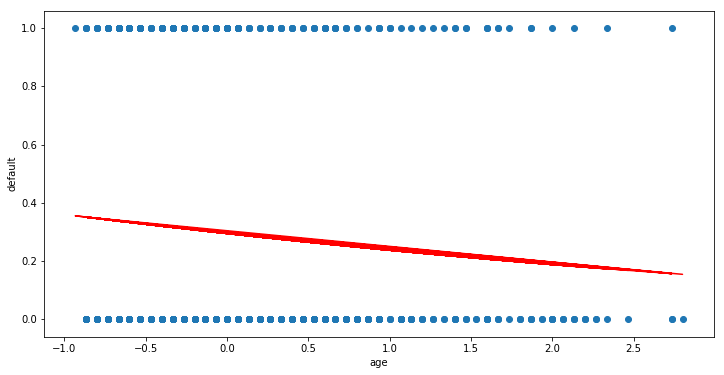

In [78]:
# plot the class predictions
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.scatter(train.age, train.Default)
plt.plot(train.age,predicted_prob, color='red')

plt.xlabel('age')
plt.ylabel('default');

### Muliple Logistic Regression Model

In [85]:
x= "+".join(train.columns[1:])
x

'duration+amount+installment+residence+age+cards+liable+checkingstatus1_A12+checkingstatus1_A13+checkingstatus1_A14+history_A31+history_A32+history_A33+history_A34+purpose_A41+purpose_A410+purpose_A42+purpose_A43+purpose_A44+purpose_A45+purpose_A46+purpose_A48+purpose_A49+savings_A62+savings_A63+savings_A64+savings_A65+employ_A72+employ_A73+employ_A74+employ_A75+status_A92+status_A93+status_A94+others_A102+others_A103+property_A122+property_A123+property_A124+otherplans_A142+otherplans_A143+housing_A152+housing_A153+job_A172+job_A173+job_A174+tele_A192+foreign_A202'

In [89]:
#Default and the duration
mod = glm(formula = "Default~" + x, data = train, family = sm.families.Binomial()).fit()
#family: for the response variable is binomial

In [90]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      651
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -299.95
Date:                Tue, 17 Sep 2019   Deviance:                       599.90
Time:                        07:09:46   Pearson chi2:                     679.
No. Iterations:                     6   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0432      0.591     -0.073      0.942      -1.202       1.115
duration                0.2942      0.142      2.075      0.038       0.016       0.572
amount                  0.3242      0.145      2.235      0.025       0.040       0.608
installment             0.6425      0.220      2.923      0.003       0.212       1.073
residence               0.1695      0.215      0.787      0.431      -0.253       0.592
age                    -0.2241      0.172     -1.305      0.192      -0.561       0.112
cards                  -0.0168      0.261     -0.064      0.949      -0.528       0.494
liable                  0.5392      0.297      1.817      0.069      -0.042       1.121
checkingstatus1_A12    -0.2249      0.269     -0.837      0.402      -0.751       0.302
checkingstatus1_A13    -1.7169      0.555     -3.095      0.002      -2.804      -0.630
checkingstatus1_A14    -1.5508      0.277     -5.594      0.000      -2.094      -1.007
history_A31            -0.0076      0.691     -0.011      0.991      -1.362       1.347
history_A32            -0.4381      0.548     -0.800      0.424      -1.512       0.635
history_A33            -0.6814      0.592     -1.151      0.250      -1.842       0.479
history_A34            -1.1647      0.550     -2.116      0.034      -2.243      -0.086
purpose_A41            -2.2177      0.521     -4.253      0.000      -3.240      -1.196
purpose_A410           -1.2854      0.903     -1.424      0.155      -3.055       0.484
purpose_A42            -0.7687      0.317     -2.428      0.015      -1.389      -0.148
purpose_A43            -0.9039      0.308     -2.939      0.003      -1.507      -0.301
purpose_A44            -0.2707      0.791     -0.342      0.732      -1.822       1.281
purpose_A45             0.3374      0.667      0.506      0.613      -0.969       1.644
purpose_A46            -0.2229      0.478     -0.466      0.641      -1.160       0.714
purpose_A48            -1.1666      1.250     -0.933      0.351      -3.617       1.284
purpose_A49            -0.7676      0.429     -1.789      0.074      -1.609       0.073
savings_A62            -0.3097      0.367     -0.844      0.399      -1.029       0.410
savings_A63            -0.4363      0.497     -0.878      0.380      -1.410       0.538
savings_A64            -1.0452      0.602     -1.736      0.083      -2.225       0.135
savings_A65            -1.0650      0.329     -3.236      0.001      -1.710      -0.420
employ_A72             -0.2766      0.531     -0.521      0.602      -1.317       0.763
employ_A73             -0.1578      0.499     -0.316      0.752      -1.136       0.821
employ_A74             -1.2060      0.553     -2.182      0.029      -2.289      -0.123
employ_A75             -0.3927      0.509     -0.771      0.440      -1.390       0.605
status_A92             -0.2412      0.474     -0.509      0.611      -1.170       

In [91]:
#reject the variables which are insignificant (i.e have p values > 5%)
#find out the correlations between the continuous variables and make sure there is no redundant infomation

In [92]:
mod.aic

697.9019679119301

In [93]:
selected_vars = mod.pvalues[mod.pvalues<.05]
selected_vars

duration               3.794337e-02
amount                 2.540921e-02
installment            3.469611e-03
checkingstatus1_A13    1.966438e-03
checkingstatus1_A14    2.213222e-08
history_A34            3.434632e-02
purpose_A41            2.108879e-05
purpose_A42            1.518829e-02
purpose_A43            3.292617e-03
savings_A65            1.211893e-03
employ_A74             2.913604e-02
status_A93             4.572144e-02
property_A122          2.610691e-02
property_A123          4.449354e-02
property_A124          1.680137e-02
otherplans_A143        2.023038e-02
housing_A152           4.498791e-02
dtype: float64

In [94]:
features = "+".join(selected_vars.index)
features

'duration+amount+installment+checkingstatus1_A13+checkingstatus1_A14+history_A34+purpose_A41+purpose_A42+purpose_A43+savings_A65+employ_A74+status_A93+property_A122+property_A123+property_A124+otherplans_A143+housing_A152'

In [95]:
#Default 
mod2 = glm(formula = "Default~" + features, data = train, family = sm.families.Binomial()).fit()
#family: for the response variable is binomial

In [96]:
mod2.aic

675.544550156749

In [99]:
mod2.pvalues[mod2.pvalues>.05]

amount             0.052625
purpose_A42        0.138705
otherplans_A143    0.056489
dtype: float64

In [100]:
#we will take out out only purpose_A42

In [101]:
newfeatures = features.replace("+purpose_A42","")
newfeatures

'duration+amount+installment+checkingstatus1_A13+checkingstatus1_A14+history_A34+purpose_A41+purpose_A43+savings_A65+employ_A74+status_A93+property_A122+property_A123+property_A124+otherplans_A143+housing_A152'

In [102]:
mod3 = glm(formula = "Default~" + newfeatures, data = train, family = sm.families.Binomial()).fit()

In [103]:
mod3.aic

675.7657880174029

In [104]:
#Check intercorrelations between the continuous X vars

In [106]:
print(newfeatures.split("+"))

['duration', 'amount', 'installment', 'checkingstatus1_A13', 'checkingstatus1_A14', 'history_A34', 'purpose_A41', 'purpose_A43', 'savings_A65', 'employ_A74', 'status_A93', 'property_A122', 'property_A123', 'property_A124', 'otherplans_A143', 'housing_A152']


In [128]:
train[newfeatures.split("+")].head(3)

,duration,amount,installment,checkingstatus1_A13,checkingstatus1_A14,history_A34,purpose_A41,purpose_A43,savings_A65,employ_A74,status_A93,property_A122,property_A123,property_A124,otherplans_A143,housing_A152
0,-0.5,-0.648778,0.5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,-0.279701,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,-0.5,-0.615661,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [129]:
train[["duration", "amount"]].corr() #medium correlation. We'll keep both the features

,duration,amount
duration,1.000000,0.614011
amount,0.614011,1.000000


In [73]:
mod3.params

Intercept             -0.826017
duration               0.262896
amount                 0.251005
installment            0.567620
checkingstatus1_A13   -1.705999
checkingstatus1_A14   -1.464372
history_A34           -0.803448
purpose_A41           -1.829731
purpose_A43           -0.583598
savings_A65           -1.003166
employ_A74            -0.857118
status_A93            -0.600859
property_A122          0.556507
property_A123          0.634592
property_A124          0.911849
otherplans_A143       -0.446054
housing_A152          -0.522007
dtype: float64

In [ ]:
#interpretation of logistic regression model. 
#every time duration increases by 1 unit, the odd ratio will increase - to a multiplier of e pow (.26)
#every time duration decreases by 1 unit, odds ratio will get divided y e pow(.26)

In [114]:
ypred = mod3.predict(X_test)
ypred[:3]

0    0.083160
1    0.049147
2    0.122563
dtype: float64

In [115]:
y_class = []
threshold = .5
for i in ypred:
    if i<threshold:
        y_class.append(0)
    else:
        y_class.append(1)

In [116]:
y_test.head(3)

,Default
0,1
1,0
2,1


In [117]:
y_class = pd.Series(y_class)

In [118]:
df = pd.DataFrame({"Actual": y_test.Default, "Predicted": y_class})
df.head(4)

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,1,1


In [119]:
#to understand the frequencies of predicted 0, actual 0; predicted 1 actual 1 ; predicted 0 actual 1 and predicted 1 actual 0
table = pd.DataFrame(pd.crosstab(df.Actual, df.Predicted))

In [120]:
table #table between actual and predicted is called as confusion matrix

Predicted,0,1
Actual,,
0,173,28
1,57,42


In [121]:
TP = table.iloc[1,1]
TN = table.iloc[0,0]
FP = table.iloc[0,1]
FN = table.iloc[1,0]

In [122]:
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.7166666666666667

In [123]:
Senstitivity = TP/(TP+FN) #%age of actual +ves predicted correctly
Specificity = TN/(TN+FP) #%age of actual -ve predicted correctly
Precision = TP/(TP+FP)
Senstitivity,Specificity,Precision

(0.42424242424242425, 0.8606965174129353, 0.6)

In [124]:
#It's very critical to identify the TPs (i.e the correct prediction of default) and very critical for me 
#to reduce the FNR (i.e type 2 error)(i.e incorrectly predicting a defaulter as a non-defaulter)

#### 1. Accuracy  = (TP + TN) / (total No)
#### 2. Sensitivity --- Recall -- TPR = TP /(TP +FN)
#### 3. Specifictity -- TNR = TN /(TN+FP)
#### 4. Precision -- PPV  = TP / (TP +FP)
#### 5. NPV   = TN / (TN+FN) - Negative prediction value


In [125]:
import sklearn.metrics as skm

In [126]:
#skm.

In [128]:
skm.accuracy_score(df.Actual, df.Predicted)

0.7166666666666667

In [129]:
df.Actual.value_counts()

0    201
1     99
Name: Actual, dtype: int64

In [130]:
skm.precision_score(df.Actual, df.Predicted)

0.6

In [131]:
skm.recall_score(df.Actual, df.Predicted)

0.42424242424242425

In [132]:
skm.f1_score(df.Actual, df.Predicted)
#by default average = binary i.e for class = 1


0.4970414201183432

In [81]:
print(skm.classification_report(df.Actual, df.Predicted))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       201
           1       0.60      0.42      0.50        99

    accuracy                           0.72       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.70      0.72      0.70       300



#### Grid SearchCV is used for tuning the hyper-parameters
Grid search can't be implemented for statsmodel, only for sklearn

In [133]:
from sklearn.linear_model import LogisticRegression
lore = LogisticRegression(random_state=2, n_jobs=-1) #n_jobs = -1 will do the parallel computations using all the cores
lore.fit(X_train, y_train)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=2,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [134]:
lore.score(X_test,y_test) #score will give accuracy

0.71

In [135]:
lore.coef_

array([[ 2.25524521e-02,  1.27745003e-04,  3.08514775e-01,
         9.29938033e-02, -1.56072862e-02, -8.17194424e-02,
         3.98479246e-01, -1.84587280e-01, -1.22833639e+00,
        -1.39182622e+00,  1.81905960e-01, -1.07010822e-01,
        -2.89024659e-01, -7.91728973e-01, -1.53177544e+00,
        -2.85909977e-01, -4.57784425e-01, -6.61388868e-01,
        -1.22944750e-02,  2.87551968e-01,  1.20228472e-01,
        -1.65610596e-01, -4.09027376e-01, -1.89062731e-01,
        -3.95864955e-01, -6.58858808e-01, -9.66958172e-01,
         8.12413360e-02,  1.51776160e-01, -7.28895044e-01,
        -4.66768760e-02, -4.03426317e-02, -6.19270353e-01,
        -1.42808214e-01,  4.69064855e-01, -6.77768961e-01,
         5.04128305e-01,  4.45123182e-01,  7.31535491e-01,
        -3.67548051e-01, -6.03636808e-01, -4.81944858e-01,
        -2.80663108e-01,  9.29490702e-02, -5.36400786e-02,
         1.73127636e-01, -4.17590919e-01, -6.03208898e-01]])

In [91]:
lore.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [136]:
np.logspace(-5, 5, 10)  #starting from 10 pow -5 to 10 pow 5 - 10 values are required

array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])

In [93]:
c_space = np.logspace(-5, 5, 10) 
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

In [148]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-1, 4, 6) 
param_grid = {'C': c_space}
grid = GridSearchCV(lore, param_grid=param_grid, cv = 5, scoring = 'recall', n_jobs = -1, verbose = 0)
#Most common scoring techniques on accuracy, precision, recall, f1, roc_auc

In [149]:
grid.fit(X_train, y_train)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=2, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [150]:
grid.best_params_ #best parameter

{'C': 10.0}

In [151]:
grid.best_score_ #Accuracy score for the best model 
#make the prediction on test data

0.46278919860627177

In [152]:
ypred = grid.predict(X_test)

In [153]:
from sklearn.metrics import f1_score, recall_score
recall_score(y_test, ypred)

0.35353535353535354

In [155]:
#to check the variance error in the model using 5-fold cross validation
#this step is performed in the end once we have finalized the model
#once you have finalized model, check the cross validation on full data (not only training data )
from sklearn.model_selection import cross_val_score
recall = cross_val_score(grid,X_train.values,train.Default.values, scoring='recall', cv = 5) 
#here we have training data, but in general we compute the cross-validations on the entire data (train+test) to get the final accuracy of the model
# and to understand the variance error
print(accuracy)
print("Average Recall Score of LoRe is: " , recall.mean())
#if despite tuning the hyper-parameters and trying out everything, still our model is having high variance error, then use some other modelling technique.

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is 

[0.41463415 0.4        0.55       0.475      0.425     ]
Average Recall Score of LoRe is:  0.4529268292682927


C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
